# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd
student_data = pd.DataFrame({'X': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Y': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

Draw a dispersion diagram (scatter plot) for the data.

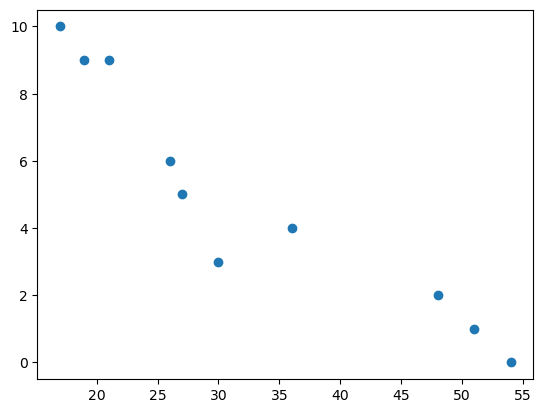

In [2]:
import matplotlib.pyplot as plt
plt.scatter(student_data['X'], student_data['Y'])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [3]:
# Si que hay una correlación que a cuanto menor sea la edad, mayor son las faltas

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
import numpy as np
covariance = np.cov(student_data['X'], student_data['Y'])
correlation = np.corrcoef(student_data['X'], student_data['Y'])
print(pd.DataFrame(covariance))
print(pd.DataFrame(correlation))

            0          1
0  187.655556 -45.566667
1  -45.566667  12.544444
          0         1
0  1.000000 -0.939163
1 -0.939163  1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [5]:
import statsmodels.api as sm
X = student_data['X']
Y = student_data['Y']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           5.57e-05
Time:                        18:13:33   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

/Users/ruben/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Plot your regression model on your scatter plot.

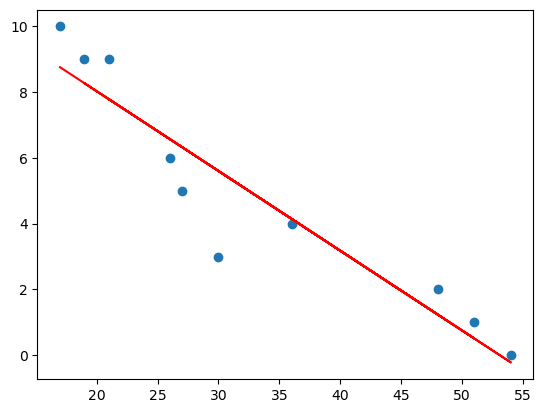

In [6]:
plt.scatter(student_data['X'], student_data['Y'])
plt.plot(student_data['X'], predictions, c='r')
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [7]:
# Si, podemos decir claramente que hay una correlación entre la edad y las faltas


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [8]:
# Import any libraries you may need & the data
coches = pd.read_csv('vehicles.csv')
coches.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [9]:
coches.corr()['CO2 Emission Grams/Mile']

Year                      -0.222300
Engine Displacement        0.803520
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
City MPG                  -0.894139
Highway MPG               -0.926405
Combined MPG              -0.926229
CO2 Emission Grams/Mile    1.000000
Fuel Cost/Year             0.930865
Name: CO2 Emission Grams/Mile, dtype: float64

<AxesSubplot:>

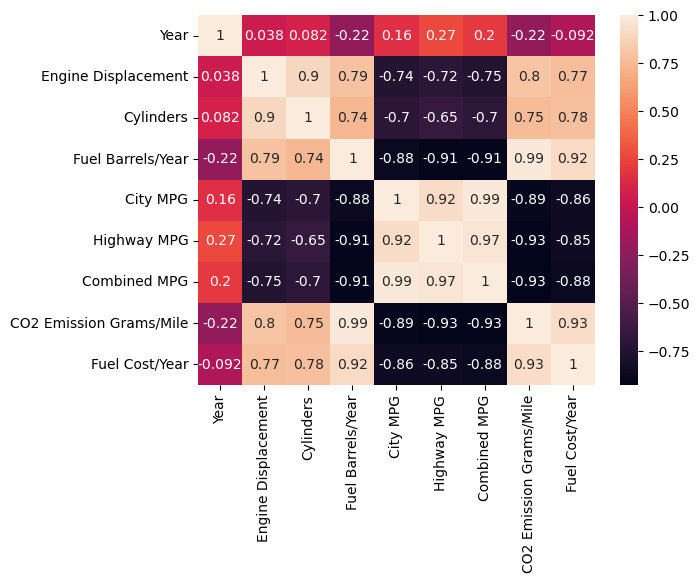

In [10]:
#voy a ver si hay correlación entre todas las columnas imprimiedo la matriz de correlación
import seaborn as sns
sns.heatmap(coches.corr(), annot=True)


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [11]:
X = coches[['Combined MPG', 'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Cylinders', 'Fuel Cost/Year']]
Y = coches['CO2 Emission Grams/Mile']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
print(model.summary())


                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.982
Model:                                 OLS   Adj. R-squared:                  0.982
Method:                      Least Squares   F-statistic:                 3.196e+05
Date:                     Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                             18:13:34   Log-Likelihood:            -1.5103e+05
No. Observations:                    35952   AIC:                         3.021e+05
Df Residuals:                        35945   BIC:                         3.021e+05
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

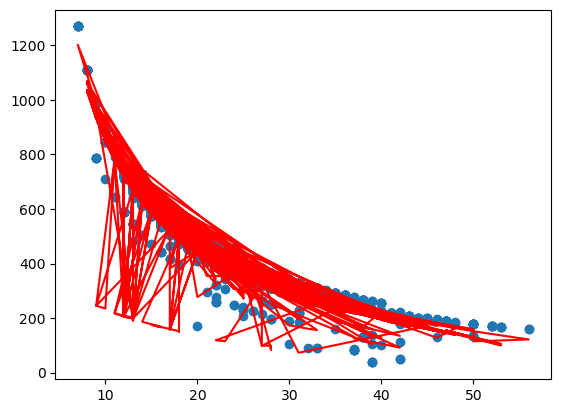

In [12]:
plt.scatter(coches['Combined MPG'], coches['CO2 Emission Grams/Mile'])
plt.plot(coches['Combined MPG'], predictions, c='r')
plt.show()

#no, no está bien, pero no consigo hacerlo con todas las columnas a la vez y elijo la de convinado


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [13]:
# Your code here. 
X = [1,3,4,6,8,9,11,14]
Y = [1,2,4,4,5,7,8,13]
party = pd.DataFrame({'X': X, 'Y': Y})
party.head()

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

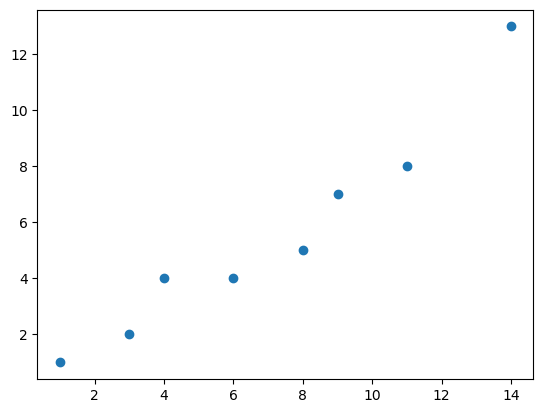

In [14]:
plt.scatter(party['X'], party['Y']);


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

<AxesSubplot:>

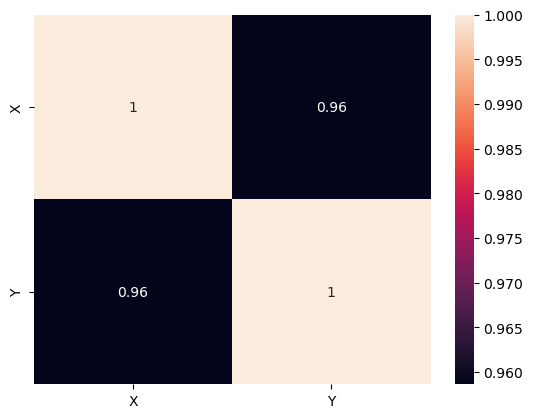

In [21]:
# Si que hay una correlación
#voy a imprimir la matriz de correlación

sns.heatmap(party.corr(), annot=True)

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [16]:
# voy a buscar el valor que es un outlier
party.describe()



,X,Y
count,8.000000,8.000000
mean,7.000000,5.500000
std,4.342481,3.817254
min,1.000000,1.000000
25%,3.750000,3.500000
50%,7.000000,4.500000
75%,9.500000,7.250000
max,14.000000,13.000000


In [17]:
#ahora eliminiaré el outlier que considero por definición, una fiesta con una persona invitada no es una fiesta
party = party.loc[party['X'] != 1]

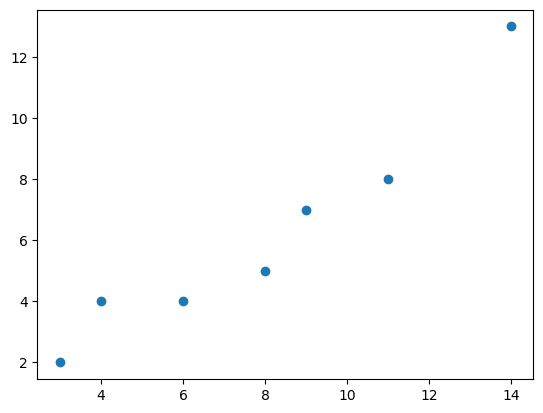

In [18]:
plt.scatter(party['X'], party['Y']);


<AxesSubplot:>

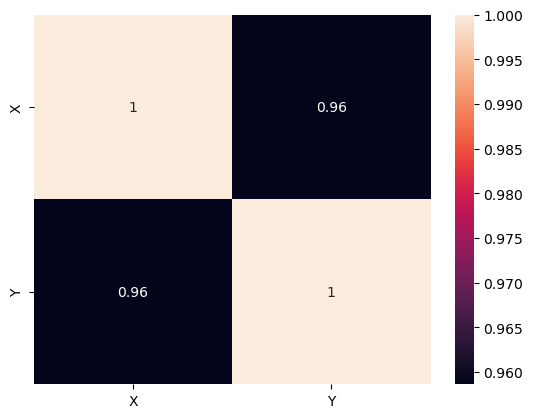

In [22]:
sns.heatmap(party.corr(), annot=True)

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [20]:
# el valor que he eliminado no modificaba nada, pero me quedo agusto sabiendo que no se considera que invitar a una persona se considera una fiesta
